In [1]:
# 在数据集上训练模型之前，需要将其预处理为预期的模型输入格式。无论您的数据是文本、图像还是音频，都需要将它们转换并组装成批量张量。
# Transformers 提供了一组预处理类来帮助为模型准备数据。在本教程中，您将了解以下内容：

# 文本，使用Tokenizer将文本转换为标记序列，创建标记的数字表示，并将它们组装成张量。
# 语音和音频，使用特征提取器从音频波形中提取顺序特征并将其转换为张量。
# 图像输入使用ImageProcessor将图像转换为张量。
# 多模态输入，使用处理器来组合分词器和特征提取器或图像处理器。

# AutoProcessor 无论您使用分词器、图像处理器、特征提取器还是处理器，它始终有效并自动为您正在使用的模型选择正确的类。

In [2]:
# 1. 自然语言处理

# 首先使用AutoTokenizer.from_pretrained()方法加载预训练的分词器。这将下载模型预训练的词汇：

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

# 然后将您的文本传递给标记器

encoded_input = tokenizer("Do not meddle in the affairs of wizards, for they are subtle and quick to anger.")
print(encoded_input)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

C:\Users\40851\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\40851\.cache\huggingface\hub\models--google-bert--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'input_ids': [101, 2091, 1136, 1143, 13002, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [3]:
# 分词器返回一个包含三个重要项目的字典：

# input_ids是句子中每个标记对应的索引。
# Attention_mask指示是否应注意令牌。
# token_type_ids标识当存在多个序列时令牌属于哪一个序列。

In [4]:
# 通过解码返回您的输入input_ids：

tokenizer.decode(encoded_input[ "input_ids" ])

'[CLS] Do not meddle in the affairs of wizards, for they are subtle and quick to anger. [SEP]'

In [5]:
# 分词器在句子中添加了两个特殊的标记 - CLS和SEP（分类器和分隔符）。并非所有模型都需要特殊标记，但如果需要，标记生成器会自动为您添加它们。

In [6]:
# 预处理多个句子

batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_inputs = tokenizer(batch_sentences)
print(encoded_inputs)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}


In [7]:
## 1.1 pad
## 句子的长度并不总是相同，这可能是一个问题，因为张量（模型输入）需要具有统一的形状。填充是一种通过向较短句子添加特殊填充标记来确保张量为矩形的策略。

# 将参数设置padding为True以填充批次中的较短序列以匹配最长序列
# 第一个和第三个句子现在用0填充，因为它们更短。
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True)
print(encoded_input)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [8]:
##1.2 截断

# 另一方面，有时序列可能太长，模型无法处理。在这种情况下，您需要将序列截断为更短的长度。
# 将参数设置truncation为True将序列截断为模型接受的最大长度：

batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True, truncation=True)
print(encoded_input)


{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [9]:
## 1.3 构建张量

# 最后，您希望分词器返回输入模型的实际张量。

# 将return_tensors参数设置pt为 PyTorch 或tfTensorFlow：

batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_input = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(encoded_input)

{'input_ids': tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   119,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [11]:
# 2. 音频

# 对于音频任务，您需要一个特征提取器来为模型准备数据集。特征提取器旨在从原始音频数据中提取特征，并将其转换为张量。

# 加载MInDS-14数据集以了解如何将特征提取器与音频数据集一起使用：

from datasets import load_dataset, Audio

dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")

# 访问该列的第一个元素audio以查看输入。调用该audio列会自动加载音频文件并重新采样：
dataset[0]["audio"]


C:\Users\40851\anaconda3\Lib\site-packages\datasets\load.py:1461: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


{'path': 'C:\\Users\\40851\\.cache\\huggingface\\datasets\\downloads\\extracted\\99bb0242dbcbfccf253b40bdebe90b66c1fa321bf08467d5e37e3e21233d2d86\\en-US~JOINT_ACCOUNT\\602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

In [12]:
# 这将返回三个条目：

# array是作为一维数组加载并可能重新采样的语音信号。
# path指向音频文件的位置。
# sampling_rate指的是每秒测量语音信号中的多少个数据点。

In [13]:
# 使用Wav2Vec2模型。查看模型卡，您将了解到 Wav2Vec2 是在 16kHz 采样语音音频上进行预训练的。
# 音频数据的采样率与用于预训练模型的数据集的采样率相匹配非常重要。如果您的数据的采样率不相同，那么您需要对数据重新采样。

# 1. 使用🤗Datasets的cast_column方法将采样率上采样到16kHz：
dataset = dataset.cast_column("audio", Audio(sampling_rate=16_000))

# 2. 再次调用该audio列以重新采样音频文件：
dataset[0]["audio"]


{'path': 'C:\\Users\\40851\\.cache\\huggingface\\datasets\\downloads\\extracted\\99bb0242dbcbfccf253b40bdebe90b66c1fa321bf08467d5e37e3e21233d2d86\\en-US~JOINT_ACCOUNT\\602ba55abb1e6d0fbce92065.wav',
 'array': array([ 1.70561689e-05,  2.18727393e-04,  2.28099860e-04, ...,
         3.43842403e-05, -5.96366226e-06, -1.76846370e-05]),
 'sampling_rate': 16000}

In [14]:
# 3. 接下来，加载特征提取器以规范化并填充输入。填充文本数据时，0会添加 a 以表示较短的序列。同样的想法也适用于音频数据。特征提取器将0- 解释为静音 - 添加到array。
# 使用AutoFeatureExtractor.from_pretrained()加载特征提取器：

from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

# 4. 将音频传递array到特征提取器。我们还建议sampling_rate在特征提取器中添加参数，以便更好地调试可能发生的任何静默错误。
audio_input = [dataset[0]["audio"]["array"]]
feature_extractor(audio_input, sampling_rate=16000)

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

C:\Users\40851\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\40851\.cache\huggingface\hub\models--facebook--wav2vec2-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

C:\Users\40851\anaconda3\Lib\site-packages\transformers\configuration_utils.py:365: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


{'input_values': [array([ 3.0293188e-04,  2.7676329e-03,  2.8821772e-03, ...,
        5.1470485e-04,  2.1597749e-05, -1.2164875e-04], dtype=float32)]}

In [16]:
# 就像分词器一样，您可以应用填充或截断来处理批量中的变量序列。看一下这两个音频样本的序列长度：

dataset[0]["audio"]["array"].shape

(173398,)

In [17]:
dataset[1]["audio"]["array"].shape

(106496,)

In [18]:
# 创建一个函数来预处理数据集，使音频样本具有相同的长度。指定最大样本长度，特征提取器将填充或截断序列以匹配它：

def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=16000,
        padding=True,
        max_length=100000,
        truncation=True,
    )
    return inputs

# 应用于preprocess_function数据集中的前几个示例：
processed_dataset = preprocess_function(dataset[:5])

In [20]:
# 样本长度现在相同并且与指定的最大长度匹配。您现在可以将处理后的数据集传递给模型！
processed_dataset["input_values"][ 0 ].shape

(100000,)

In [21]:
processed_dataset["input_values"][ 3 ].shape

(100000,)

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

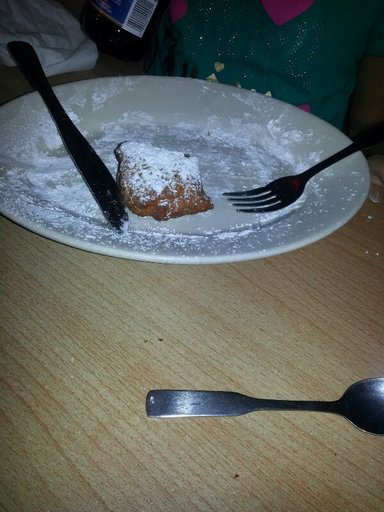

In [24]:
# 2. 机器视觉
# 对于计算机视觉任务，您需要一个图像处理器来为模型准备数据集。图像预处理由几个步骤组成，将图像转换为模型期望的输入。
# 这些步骤包括但不限于调整大小、标准化、颜色通道校正以及将图像转换为张量。

from datasets import load_dataset
# split参数仅从训练分割中加载小样本，因为数据集非常大
dataset = load_dataset("food101", split="train[:10]")
# 接下来，使用数据集功能查看图像Image
dataset[0]["image"]

In [25]:
# 使用AutoImageProcessor.from_pretrained()加载图像处理器
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

# 1. 使用Compose将几个变换链接在一起 -RandomResizedCrop和ColorJitter。
# 注意，对于调整大小，我们可以从image_processor. 对于某些模型，需要精确的高度和宽度，而对于其他模型，仅shortest_edge定义了高度和宽度。
from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose

size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)

_transforms = Compose([RandomResizedCrop(size), ColorJitter(brightness=0.5, hue=0.5)])

# 2. 模型接受pixel_values 作为其输入。ImageProcessor可以负责标准化图像并生成适当的张量。
# 创建一个函数，将一批图像的图像增强和图像预处理相结合并生成pixel_values：

def transforms(examples):
    images = [_transforms(img.convert("RGB")) for img in examples["image"]]
    examples["pixel_values"] = image_processor(images, do_resize=False, return_tensors="pt")["pixel_values"]
    return examples

# 3. 然后使用数据集set_transform动态应用转换
dataset.set_transform(transforms)

# 4. 现在，当您访问图像时，您会注意到图像处理器已添加pixel_values. 您现在可以将处理后的数据集传递给模型！
dataset[0].keys()


dict_keys(['image', 'label', 'pixel_values'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


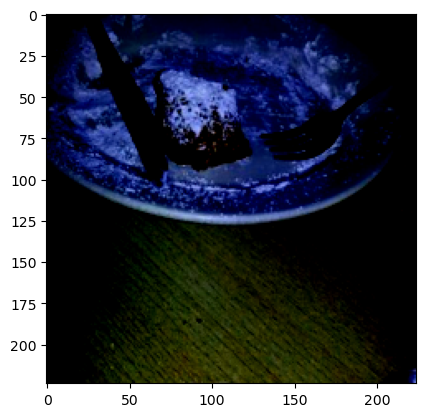

In [26]:
import numpy as np
import matplotlib.pyplot as plt

img = dataset[0]["pixel_values"]
plt.imshow(img.permute(1, 2, 0))

In [27]:
# 对于对象检测、语义分割、实例分割和全景分割等任务，ImageProcessor 提供后处理方法。这些方法将模型的原始输出转换为有意义的预测，例如边界框或分割图。

In [28]:
# pad
# 在某些情况下，例如，在微调DETR时，模型会在训练时应用尺度增强。这可能会导致一批图像的尺寸不同。
# 您可以使用DetrImageProcessor.pad()并定义一个自定义collate_fn来将图像一起批处理。

def collate_fn(batch):
    pixel_values = [item["pixel_values"] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item["labels"] for item in batch]
    batch = {}
    batch["pixel_values"] = encoding["pixel_values"]
    batch["pixel_mask"] = encoding["pixel_mask"]
    batch["labels"] = labels
    return batch


In [29]:
# 4. 多模联合

# 对于涉及多模式输入的任务，您需要一个处理器来为模型准备数据集。处理器将两个处理对象耦合在一起，例如分词器和特征提取器。
# 加载LJ语音数据集以了解如何使用处理器进行自动语音识别 (ASR)：

from datasets import load_dataset

lj_speech = load_dataset("lj_speech", split="train")

# 对于ASR自动语音识别，主要关注audio和text，其它列可以删除

lj_speech = lj_speech.map(remove_columns=["file", "id", "normalized_text"])

lj_speech[0]["audio"]


Generating train split:   0%|          | 0/13100 [00:00<?, ? examples/s]

Map:   0%|          | 0/13100 [00:00<?, ? examples/s]

{'path': 'LJ001-0001.wav',
 'array': array([-7.32421875e-04, -7.62939453e-04, -6.40869141e-04, ...,
         7.32421875e-04,  2.13623047e-04,  6.10351562e-05]),
 'sampling_rate': 22050}

In [30]:
lj_speech[0]["text"]

'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'

In [31]:
# 请记住，您应该始终对音频数据集的采样率进行重新采样，以匹配用于预训练模型的数据集的采样率
lj_speech = lj_speech.cast_column("audio", Audio(sampling_rate=16_000))

In [32]:
# 使用AutoProcessor.from_pretrained()加载处理器

from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("facebook/wav2vec2-base-960h")

In [33]:
# array创建一个函数来处理to中包含的音频数据input_values，并对textto进行标记labels。这些是模型的输入：
def prepare_dataset(example):
    audio = example["audio"]
    example.update(processor(audio=audio["array"], text=example["text"], sampling_rate=16000))
    return example

In [34]:
# 将prepare_dataset函数应用于样本
prepare_dataset(lj_speech[0])

{'audio': {'path': 'LJ001-0001.wav',
  'array': array([-0.00061751, -0.00074496, -0.00068972, ...,  0.00068615,
          0.00013802,  0.        ]),
  'sampling_rate': 16000},
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'input_values': [array([-6.4672530e-03, -7.7975118e-03, -7.2209709e-03, ...,
          7.1398332e-03,  1.4185999e-03, -2.1961601e-05], dtype=float32)],
 'labels': [23,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
 